https://y-t-g.github.io/tutorials/yolov8n-add-classes/ 사이트를 참고하여 작성하였습니다.

# YOLOv8m 모델 학습

COCO 데이터셋으로 학습된 YOLOv8n 모델에 새로운 클래스를 추가하여 전이학습

In [1]:
from ultralytics import YOLO
import torch

#### 기존 레이어 동결

In [2]:
model = YOLO("yolov8n.pt")
model.state_dict().keys()

def put_in_eval_mode(trainer, n_layers=22):
  for i, (name, module) in enumerate(trainer.model.named_modules()):
    if name.endswith("bn") and int(name.split('.')[1]) < n_layers:
      module.eval()
      module.track_running_stats = False

model.add_callback("on_train_epoch_start", put_in_eval_mode)
model.add_callback("on_pretrain_routine_start", put_in_eval_mode)

#### 새로운 클래스에 대해 학습

In [3]:
results = model.train(
    data='/content/datasets/yolo_dataset/data.yaml',
    freeze=22,
    epochs=100,
    imgsz=640,
    batch=16
)

New https://pypi.org/project/ultralytics/8.3.32 available 😃 Update with 'pip install -U ultralytics'


Ultralytics 8.3.28 🚀 Python-3.10.15 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 15974MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/yolo_dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=22, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

train: Scanning /content/datasets/yolo_dataset/train/labels.cache... 2877 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2877/2877 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.16). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/yolo_dataset/val/labels.cache... 368 images, 0 backgrounds, 0 corrupt: 100%|██████████| 368/368 [00:00<?, ?it/s]


Plotting labels to /ultralytics/runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /ultralytics/runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.06G      1.209      2.191      1.071         28        640: 100%|██████████| 180/180 [00:09<00:00, 19.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 13.29it/s]

                   all        368        433      0.747       0.73      0.776       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.784G      1.215      1.365      1.084         28        640: 100%|██████████| 180/180 [00:08<00:00, 22.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.56it/s]

                   all        368        433      0.838      0.734      0.812      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.782G      1.228      1.111      1.091         41        640: 100%|██████████| 180/180 [00:08<00:00, 22.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.23it/s]

                   all        368        433      0.828      0.762       0.84      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.782G      1.216      1.011      1.085         31        640: 100%|██████████| 180/180 [00:08<00:00, 21.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.86it/s]

                   all        368        433      0.855      0.803      0.856      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      0.78G      1.193     0.9626      1.078         29        640: 100%|██████████| 180/180 [00:08<00:00, 22.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.91it/s]

                   all        368        433      0.851       0.82      0.865      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      0.78G      1.193     0.9251      1.082         22        640: 100%|██████████| 180/180 [00:08<00:00, 22.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 20.61it/s]

                   all        368        433      0.859      0.822      0.864      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      0.78G      1.182      0.914      1.073         29        640: 100%|██████████| 180/180 [00:08<00:00, 22.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.83it/s]

                   all        368        433      0.853      0.785      0.862      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.782G      1.156     0.8811       1.06         33        640: 100%|██████████| 180/180 [00:08<00:00, 21.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.10it/s]

                   all        368        433      0.826      0.834       0.87      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      0.78G      1.166     0.8745      1.069         30        640: 100%|██████████| 180/180 [00:08<00:00, 22.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.25it/s]

                   all        368        433      0.866      0.801      0.866      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      0.78G      1.151      0.851      1.065         34        640: 100%|██████████| 180/180 [00:08<00:00, 21.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.53it/s]

                   all        368        433      0.862      0.829      0.885      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      0.78G      1.167     0.8424      1.065         38        640: 100%|██████████| 180/180 [00:08<00:00, 21.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.68it/s]

                   all        368        433      0.848      0.815      0.876      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      0.78G      1.148     0.8419      1.058         35        640: 100%|██████████| 180/180 [00:08<00:00, 21.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.60it/s]

                   all        368        433      0.815      0.827      0.873      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      0.78G      1.138     0.8216      1.056         33        640: 100%|██████████| 180/180 [00:08<00:00, 22.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.18it/s]

                   all        368        433      0.859      0.806      0.869      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      0.78G      1.121     0.8227       1.05         31        640: 100%|██████████| 180/180 [00:08<00:00, 22.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.70it/s]

                   all        368        433      0.845      0.806      0.871      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      0.78G      1.125     0.8174      1.052         32        640: 100%|██████████| 180/180 [00:08<00:00, 21.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.75it/s]

                   all        368        433      0.839      0.831       0.87      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      0.78G      1.118      0.798      1.052         23        640: 100%|██████████| 180/180 [00:08<00:00, 22.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.20it/s]

                   all        368        433      0.875      0.818      0.878      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      0.78G      1.112        0.8      1.043         29        640: 100%|██████████| 180/180 [00:08<00:00, 21.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.23it/s]

                   all        368        433      0.882      0.801      0.888      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      0.78G      1.141     0.8114      1.051         27        640: 100%|██████████| 180/180 [00:08<00:00, 22.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.59it/s]

                   all        368        433      0.874      0.818      0.875      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      0.78G       1.11        0.8      1.045         40        640: 100%|██████████| 180/180 [00:08<00:00, 22.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.19it/s]

                   all        368        433      0.842      0.843      0.889      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      0.78G      1.113     0.7927      1.046         26        640: 100%|██████████| 180/180 [00:08<00:00, 22.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.03it/s]

                   all        368        433      0.821      0.848      0.875      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      0.78G      1.103     0.7739      1.034         32        640: 100%|██████████| 180/180 [00:08<00:00, 21.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.89it/s]

                   all        368        433      0.864      0.851      0.882      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      0.78G      1.115     0.7893      1.046         29        640: 100%|██████████| 180/180 [00:08<00:00, 21.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.84it/s]

                   all        368        433      0.869       0.83      0.877      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.782G      1.102     0.7843      1.039         28        640: 100%|██████████| 180/180 [00:08<00:00, 22.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.74it/s]

                   all        368        433      0.818      0.822      0.869      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      0.78G      1.113      0.768       1.04         35        640: 100%|██████████| 180/180 [00:08<00:00, 21.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.87it/s]

                   all        368        433      0.886       0.79      0.879      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      0.78G      1.096     0.7784      1.036         39        640: 100%|██████████| 180/180 [00:08<00:00, 22.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.39it/s]

                   all        368        433      0.848      0.852      0.895      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      0.78G      1.105     0.7883      1.037         27        640: 100%|██████████| 180/180 [00:08<00:00, 21.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.26it/s]

                   all        368        433      0.847      0.848      0.883      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      0.78G      1.099     0.7607      1.035         21        640: 100%|██████████| 180/180 [00:08<00:00, 21.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.31it/s]

                   all        368        433      0.841      0.841      0.884       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      0.78G      1.099     0.7599      1.037         20        640: 100%|██████████| 180/180 [00:08<00:00, 21.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.56it/s]

                   all        368        433       0.87      0.824      0.885      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      0.78G      1.112     0.7604      1.043         31        640: 100%|██████████| 180/180 [00:08<00:00, 22.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.90it/s]

                   all        368        433      0.861      0.818      0.883      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      0.78G      1.088     0.7628      1.039         30        640: 100%|██████████| 180/180 [00:08<00:00, 21.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.39it/s]

                   all        368        433      0.858      0.836      0.898      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      0.78G      1.073     0.7538      1.026         34        640: 100%|██████████| 180/180 [00:08<00:00, 21.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.30it/s]

                   all        368        433      0.856      0.843      0.884      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      0.78G      1.082     0.7466      1.026         26        640: 100%|██████████| 180/180 [00:08<00:00, 22.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.10it/s]

                   all        368        433      0.837      0.866      0.899      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      0.78G      1.083     0.7595      1.033         27        640: 100%|██████████| 180/180 [00:08<00:00, 21.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.95it/s]

                   all        368        433      0.861      0.836      0.878       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      0.78G      1.082     0.7436      1.024         22        640: 100%|██████████| 180/180 [00:08<00:00, 21.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.90it/s]

                   all        368        433      0.874      0.822      0.887      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      0.78G      1.088     0.7442      1.031         21        640: 100%|██████████| 180/180 [00:08<00:00, 21.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 20.22it/s]

                   all        368        433      0.854      0.838       0.88      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      0.78G      1.077     0.7452       1.03         31        640: 100%|██████████| 180/180 [00:08<00:00, 21.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.17it/s]

                   all        368        433      0.855      0.841      0.886      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      0.78G      1.076     0.7436      1.019         34        640: 100%|██████████| 180/180 [00:08<00:00, 22.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.14it/s]

                   all        368        433      0.846      0.852      0.883      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      0.78G      1.057     0.7304      1.019         35        640: 100%|██████████| 180/180 [00:08<00:00, 22.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 20.02it/s]

                   all        368        433       0.86      0.852      0.889       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      0.78G      1.069     0.7395      1.021         25        640: 100%|██████████| 180/180 [00:08<00:00, 22.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.29it/s]

                   all        368        433      0.865      0.834      0.874      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      0.78G      1.084     0.7427      1.031         35        640: 100%|██████████| 180/180 [00:08<00:00, 21.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.19it/s]

                   all        368        433       0.85      0.852      0.888      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      0.78G      1.075     0.7408      1.024         26        640: 100%|██████████| 180/180 [00:08<00:00, 22.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.64it/s]


                   all        368        433      0.854      0.843      0.898       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      0.78G      1.066     0.7409      1.023         29        640: 100%|██████████| 180/180 [00:08<00:00, 21.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.05it/s]

                   all        368        433      0.847      0.843      0.886      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      0.78G      1.066     0.7459       1.02         22        640: 100%|██████████| 180/180 [00:08<00:00, 22.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.12it/s]

                   all        368        433      0.867       0.83       0.89      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      0.78G      1.063     0.7304      1.023         23        640: 100%|██████████| 180/180 [00:08<00:00, 21.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.34it/s]

                   all        368        433       0.87      0.838       0.89      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      0.78G      1.066      0.743      1.023         24        640: 100%|██████████| 180/180 [00:08<00:00, 22.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.01it/s]

                   all        368        433      0.838      0.869      0.895      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      0.78G      1.056     0.7158      1.019         17        640: 100%|██████████| 180/180 [00:08<00:00, 21.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.54it/s]

                   all        368        433       0.86      0.848      0.898      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      0.78G      1.065     0.7331      1.019         32        640: 100%|██████████| 180/180 [00:08<00:00, 21.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.16it/s]

                   all        368        433       0.86       0.85      0.884      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.782G      1.045     0.7194      1.015         29        640: 100%|██████████| 180/180 [00:08<00:00, 21.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.47it/s]

                   all        368        433      0.819      0.873      0.887      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      0.78G      1.071      0.745      1.027         36        640: 100%|██████████| 180/180 [00:08<00:00, 22.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 21.11it/s]

                   all        368        433      0.875      0.822      0.891      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      0.78G      1.073     0.7203      1.017         25        640: 100%|██████████| 180/180 [00:08<00:00, 21.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.10it/s]

                   all        368        433      0.874      0.836       0.89      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      0.78G      1.069      0.723      1.017         22        640: 100%|██████████| 180/180 [00:08<00:00, 22.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.18it/s]

                   all        368        433      0.836      0.868      0.889      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      0.78G       1.07     0.7295      1.022         20        640: 100%|██████████| 180/180 [00:08<00:00, 22.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.90it/s]

                   all        368        433       0.83      0.871      0.886      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      0.78G      1.045     0.7213      1.015         30        640: 100%|██████████| 180/180 [00:08<00:00, 21.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 20.13it/s]

                   all        368        433      0.864      0.836      0.887      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      0.78G      1.044     0.7127       1.01         21        640: 100%|██████████| 180/180 [00:08<00:00, 21.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 20.68it/s]

                   all        368        433      0.829      0.871      0.902      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      0.78G      1.038     0.7104      1.015         36        640: 100%|██████████| 180/180 [00:08<00:00, 22.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.35it/s]

                   all        368        433      0.858      0.839      0.876      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      0.78G      1.055     0.7234      1.014         29        640: 100%|██████████| 180/180 [00:08<00:00, 21.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.13it/s]

                   all        368        433      0.891      0.822      0.891       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      0.78G      1.063     0.7233      1.017         24        640: 100%|██████████| 180/180 [00:08<00:00, 22.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.13it/s]

                   all        368        433      0.856      0.866      0.893      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      0.78G      1.028     0.6995      1.012         29        640: 100%|██████████| 180/180 [00:08<00:00, 22.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.21it/s]


                   all        368        433      0.863      0.848      0.891       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      0.78G      1.046     0.7028      1.015         33        640: 100%|██████████| 180/180 [00:08<00:00, 21.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 20.25it/s]

                   all        368        433      0.841      0.865      0.887      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      0.78G       1.05     0.7009       1.01         34        640: 100%|██████████| 180/180 [00:08<00:00, 22.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.88it/s]

                   all        368        433      0.858      0.841      0.883      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      0.78G      1.039     0.7046      1.005         34        640: 100%|██████████| 180/180 [00:08<00:00, 21.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.49it/s]

                   all        368        433      0.861      0.858      0.901      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      0.78G      1.031     0.7037      1.003         26        640: 100%|██████████| 180/180 [00:08<00:00, 22.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.42it/s]

                   all        368        433      0.864      0.855      0.899       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.782G      1.049     0.7052      1.016         15        640: 100%|██████████| 180/180 [00:08<00:00, 22.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.58it/s]

                   all        368        433      0.856      0.852      0.891      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      0.78G      1.024     0.6839      1.003         43        640: 100%|██████████| 180/180 [00:08<00:00, 22.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.06it/s]

                   all        368        433      0.873      0.844      0.898      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      0.78G      1.036     0.6954      1.003         25        640: 100%|██████████| 180/180 [00:08<00:00, 22.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 14.79it/s]

                   all        368        433      0.854      0.871      0.896      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      0.78G      1.036     0.6904      1.006         27        640: 100%|██████████| 180/180 [00:08<00:00, 22.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.06it/s]

                   all        368        433      0.846      0.878      0.899      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      0.78G      1.043     0.7018      1.012         27        640: 100%|██████████| 180/180 [00:08<00:00, 22.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.25it/s]

                   all        368        433       0.88      0.847      0.895      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      0.78G      1.023     0.6924      1.004         18        640: 100%|██████████| 180/180 [00:08<00:00, 22.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.11it/s]

                   all        368        433       0.86       0.85      0.898      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.782G      1.041     0.7076      1.008         28        640: 100%|██████████| 180/180 [00:08<00:00, 21.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.54it/s]

                   all        368        433      0.872      0.835      0.896      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      0.78G      1.024     0.6917     0.9996         34        640: 100%|██████████| 180/180 [00:08<00:00, 22.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.04it/s]

                   all        368        433      0.848      0.876      0.899      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      0.78G      1.033     0.6989      1.005         27        640: 100%|██████████| 180/180 [00:08<00:00, 22.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.94it/s]

                   all        368        433      0.864      0.866      0.906      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      0.78G      1.015     0.6911      1.002         27        640: 100%|██████████| 180/180 [00:08<00:00, 22.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.27it/s]

                   all        368        433      0.877      0.861      0.902      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      0.78G      1.026     0.6949      1.005         25        640: 100%|██████████| 180/180 [00:08<00:00, 22.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.20it/s]

                   all        368        433       0.87      0.847      0.899      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      0.78G      1.019     0.6828      1.002         32        640: 100%|██████████| 180/180 [00:08<00:00, 21.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 20.04it/s]

                   all        368        433      0.861      0.845      0.895      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      0.78G      1.017     0.6886      1.002         33        640: 100%|██████████| 180/180 [00:08<00:00, 22.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 14.93it/s]

                   all        368        433      0.857      0.859      0.905      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      0.78G      1.024     0.6862     0.9993         26        640: 100%|██████████| 180/180 [00:08<00:00, 22.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.33it/s]

                   all        368        433      0.846      0.863      0.894      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      0.78G      1.023     0.6915      1.005         28        640: 100%|██████████| 180/180 [00:08<00:00, 21.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.11it/s]

                   all        368        433      0.834      0.885      0.898      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      0.78G      1.027      0.689      1.002         31        640: 100%|██████████| 180/180 [00:08<00:00, 20.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 20.89it/s]

                   all        368        433       0.88      0.834      0.897      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      0.78G      1.024     0.6774     0.9938         36        640: 100%|██████████| 180/180 [00:08<00:00, 22.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.24it/s]

                   all        368        433      0.886      0.843      0.896      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      0.78G      1.018     0.6798     0.9973         26        640: 100%|██████████| 180/180 [00:08<00:00, 21.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.73it/s]

                   all        368        433      0.882      0.845      0.903      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      0.78G      1.011     0.6749      0.995         47        640: 100%|██████████| 180/180 [00:08<00:00, 22.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.67it/s]

                   all        368        433      0.863      0.856      0.903      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      0.78G      1.022     0.6786     0.9981         35        640: 100%|██████████| 180/180 [00:08<00:00, 22.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.55it/s]

                   all        368        433      0.863      0.858      0.901      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      0.78G     0.9962     0.6742     0.9874         38        640: 100%|██████████| 180/180 [00:08<00:00, 21.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 20.88it/s]

                   all        368        433      0.851      0.871      0.899      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      0.78G      1.019     0.6813          1         32        640: 100%|██████████| 180/180 [00:08<00:00, 21.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.67it/s]

                   all        368        433      0.878      0.848      0.901      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      0.78G     0.9952     0.6777     0.9917         23        640: 100%|██████████| 180/180 [00:08<00:00, 22.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.31it/s]

                   all        368        433      0.883       0.85        0.9      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      0.78G     0.9952     0.6774     0.9905         29        640: 100%|██████████| 180/180 [00:08<00:00, 21.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.45it/s]

                   all        368        433      0.873      0.855      0.902      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      0.78G      1.008     0.6735     0.9904         37        640: 100%|██████████| 180/180 [00:08<00:00, 21.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.00it/s]

                   all        368        433      0.849      0.859      0.891      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      0.78G      1.016      0.679      0.995         25        640: 100%|██████████| 180/180 [00:08<00:00, 21.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.06it/s]

                   all        368        433      0.864      0.853      0.895      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      0.78G      1.019     0.6766      1.001         27        640: 100%|██████████| 180/180 [00:08<00:00, 22.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.77it/s]

                   all        368        433      0.889      0.834      0.898      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      0.78G      1.016     0.6795     0.9933         38        640: 100%|██████████| 180/180 [00:08<00:00, 22.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.40it/s]

                   all        368        433      0.873      0.841      0.901      0.648


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.05G     0.9408     0.6222     0.9823         17        640: 100%|██████████| 180/180 [00:08<00:00, 21.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.03it/s]

                   all        368        433      0.865      0.843      0.895      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.782G     0.9135     0.6087      0.977         13        640: 100%|██████████| 180/180 [00:07<00:00, 23.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.18it/s]

                   all        368        433       0.87       0.85      0.894      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.782G     0.9158     0.6076      0.972         13        640: 100%|██████████| 180/180 [00:07<00:00, 23.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.27it/s]

                   all        368        433      0.874      0.859      0.898      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      0.78G     0.9264     0.6109     0.9771         17        640: 100%|██████████| 180/180 [00:07<00:00, 23.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.44it/s]

                   all        368        433      0.866      0.873        0.9      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.782G     0.9335     0.6149     0.9777         13        640: 100%|██████████| 180/180 [00:07<00:00, 23.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.32it/s]

                   all        368        433      0.873      0.872        0.9      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.782G     0.9224     0.6058     0.9732         17        640: 100%|██████████| 180/180 [00:07<00:00, 23.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.28it/s]

                   all        368        433      0.878      0.867      0.901      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.782G     0.9246     0.6043     0.9785         13        640: 100%|██████████| 180/180 [00:07<00:00, 23.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.60it/s]

                   all        368        433       0.87      0.866      0.895      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      0.78G     0.9243     0.6132     0.9754         15        640: 100%|██████████| 180/180 [00:07<00:00, 23.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.34it/s]

                   all        368        433      0.865      0.868      0.892      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.782G     0.9279     0.6057     0.9762         15        640: 100%|██████████| 180/180 [00:07<00:00, 23.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.77it/s]

                   all        368        433      0.861      0.875      0.899       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.784G     0.9197     0.6052     0.9755         14        640: 100%|██████████| 180/180 [00:07<00:00, 23.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.68it/s]

                   all        368        433      0.867      0.873      0.896      0.648



100 epochs completed in 0.258 hours.
Optimizer stripped from /ultralytics/runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from /ultralytics/runs/detect/train3/weights/best.pt, 6.2MB

Validating /ultralytics/runs/detect/train3/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.15 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 15974MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.67it/s]


                   all        368        433      0.863      0.857      0.903      0.652
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /ultralytics/runs/detect/train3


#### 새로운 클래스로 학습한 모델을 기존 모델에 병합

In [4]:
new_state_dict = dict()

#  Increment the head number by 1 in the state_dict
for k, v in model.state_dict().items():
  if k.startswith("model.model.22"):
    new_state_dict[k.replace("model.22", "model.23")] = v

torch.save(new_state_dict, "yolov8n_single.pth")

model_2 = YOLO('ultralytics/cfg/models/v8/yolov8n-transfer.yaml', task="detect").load('yolov8n.pt')
state_dict = torch.load("yolov8n_single.pth")
model_2.load_state_dict(state_dict, strict=False)
model_2.save("yolov8n_composed.pt")

model_composed = YOLO("yolov8n_composed.pt")

Transferred 355/440 items from pretrained weights



image 1/1 /content/datasets/test5.jpg: 448x640 14 0s, 11 80s, 6.0ms
Speed: 2.1ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


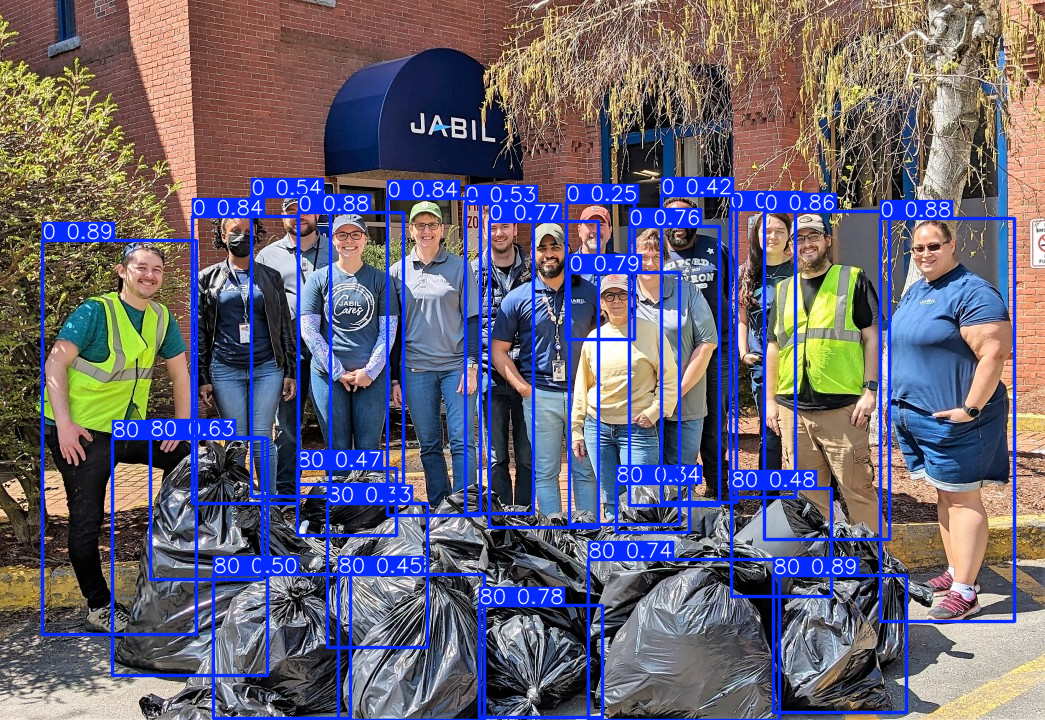

In [12]:
results = model_composed.predict(
    source="/content/datasets/test5.jpg", # source image from https://clintongreenway.org/
    classes=[0, 80],
    conf=0.25,
    save=False,
)

from PIL import Image
img = results[0].plot(line_width=2, font_size=1.5)
Image.fromarray(img[:, :, ::-1])
